## Setup

In [6]:
import pandas as pd
import numpy as np
import config
# import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot

# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style()

In [7]:
from functions import load_train, load_val
X_t, y_t = load_train(boolean=True)
X_v, y_v = load_val(boolean=True)
print("training set healthy proportion:", (float(y_t.sum() / y_t.shape[0])))
print("validation set healthy propoportion:", (float(y_v.sum() / y_v.shape[0])))

training set healthy proportion: 0.6063952150908672
validation set healthy propoportion: 0.17378497790868924


In [8]:
# combine data
X = pd.concat([X_t, X_v])
y = pd.concat([y_t, y_v])
print("total dataset healthy propoportion:", float(y.sum() / len(y)))

total dataset healthy propoportion: 0.547950656585754


In [11]:
from functions import get_groups
groups = get_groups(X)
groups

array([ 8,  8,  8, ...,  5,  5, 41])

## Logistic Regression

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.model_selection import LeaveOneOut

import numpy as np

groups = get_groups(X)

strat = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
leave = LeaveOneGroupOut()
leave2 = LeaveOneOut()

for C in [0.3]:
    print("C parameter:", C)
    logreg = LogisticRegression(C=C, penalty='l1',
    fit_intercept=True, max_iter=700, random_state=42, # l1_ratio=0.8,
                        solver='saga', n_jobs=-1, verbose=10)
    scores = cross_val_score(logreg, X, np.ravel(y), cv = leave2, groups=groups,
                             scoring = "balanced_accuracy", n_jobs=-1, verbose=10)
    print("Raw scores:", scores)
    print("Mean score:", np.mean(scores))
    print("Std:", np.std(scores))
    print()

C parameter: 0.3


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:   28.7s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   34.3s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:   34.5s
[Parallel(n_jobs=-1)]: Done 113 tasks      | elapsed:   45.7s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:   51.3s


KeyboardInterrupt: 

In [80]:
import warnings
warnings.filterwarnings("ignore")
for i in range(42):
    logreg = LogisticRegression(C=C, penalty='l1',
    fit_intercept=True, max_iter=700, random_state=42, # l1_ratio=0.8,
                        solver='saga', n_jobs=-1, verbose=0)
    X_train = X.iloc[groups != i, :].copy()
    y_train = y.iloc[groups != i, :].copy()
    X_test = X.iloc[groups == i, :].copy()
    y_test = y.iloc[groups == i, :].copy()
    logreg.fit(X_train, y_train.values.ravel())
    y_hat = logreg.predict(X_test)
    score = balanced_accuracy_score(y_test, y_hat)
    print(score)

0.6243470832309668

In [35]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score

for C in [1]:
    print("C parameter:", C)
    logreg = LogisticRegression(C=C, penalty='l1',
    fit_intercept=True, max_iter=700, random_state=42, 
                        solver='saga', n_jobs=-1, verbose=0)
    logreg.fit(X, y)
    y_hat = logreg.predict(X)
    score = balanced_accuracy_score(y, y_hat)
    print(C)
    print(score)

C parameter: 1


/Users/daniel/opt/anaconda3/envs/data/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


1
0.7926350084895721


In [46]:
logreg = LogisticRegression(C=1, penalty='l1',
fit_intercept=True, max_iter=700, random_state=42, 
                    solver='saga', n_jobs=-1, verbose=0)
logreg.fit(X, y)

/Users/daniel/opt/anaconda3/envs/data/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(C=1, max_iter=700, n_jobs=-1, penalty='l1', random_state=42,
                   solver='saga')

In [85]:
from sklearn.model_selection import GroupKFold
group_kfold = GroupKFold(5)

In [86]:
for traini, testi in group_kfold.split(X, y, groups):
    display(y.iloc[testi, :].index.get_level_values(0).unique())

Index(['PRJEB11532', 'PRJEB8094', 'PRJNA305507', 'PRJNA385949', 'N8'], dtype='object', name='Study Accession')

Index(['PRJDB3601', 'PRJEB10878', 'PRJEB12947', 'PRJEB4336', 'PRJNA299502',
       'PRJNA319574', 'PRJNA373879', 'L1', 'N5'],
      dtype='object', name='Study Accession')

Index(['PRJEB1690', 'PRJEB1786', 'PRJEB6070', 'PRJEB6456', 'PRJNA278393',
       'PRJNA422434', 'V1', 'N7', 'N1'],
      dtype='object', name='Study Accession')

Index(['PRJEB12123', 'PRJEB15371', 'PRJEB19090', 'PRJEB21528', 'PRJEB7774',
       'PRJNA177201', 'PRJNA268964', 'PRJNA290729', 'PRJNA328899',
       'PRJNA389280'],
      dtype='object', name='Study Accession')

Index(['PRJEB1220', 'PRJEB12449', 'PRJEB13870', 'PRJEB6337', 'PRJEB6997',
       'PRJNA48479', 'H1', 'C1', 'N4'],
      dtype='object', name='Study Accession')

In [128]:
from sklearn.model_selection import learning_curve
import seaborn as sns
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, X, y, cv, data_points=5, groups=None):
    t_sizes = np.linspace(0.1, 1.0, data_points)
    train_sizes, train_scores, valid_scores = learning_curve(logreg,
        X, y.values.ravel(), cv=cv, scoring="accuracy", n_jobs=-1, verbose=10, train_sizes=t_sizes, groups=groups,
        shuffle=True, random_state=42)
    training_loss = train_scores.flatten()
    valid_loss = valid_scores.flatten()
    losses = np.concatenate([training_loss, valid_loss])
    learning = pd.DataFrame(losses, columns=['accuracy'])
    n_splits = cv.get_n_splits()
    learning['set'] = ['training'] * (data_points * n_splits) + ['validation'] * (data_points * n_splits)
    learning['training set size'] = [s for s in train_sizes for i in range(n_splits)] * 2
    plt.figure(figsize=(20,10))
    plt.title("Training Set and Validation Set Accuracy vs Training Set Size")
    sns.lineplot(data=learning, x='training set size', y='accuracy', hue="set")

In [219]:
logreg = LogisticRegression(C=1, penalty='l1',
    fit_intercept=True, max_iter=1000, random_state=42, # l1_ratio=0.8,
                        solver='saga', n_jobs=-1)

[learning_curve] Training set sizes: [ 452  904 1356 1809 2261 2713 3166 3618 4070 4523]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of 100 | elapsed:    2.7s remaining:  2.2min
[Parallel(n_jobs=-1)]: Done  13 out of 100 | elapsed:    6.5s remaining:   43.3s
[Parallel(n_jobs=-1)]: Done  24 out of 100 | elapsed:    9.2s remaining:   29.1s
[Parallel(n_jobs=-1)]: Done  35 out of 100 | elapsed:   14.5s remaining:   27.0s
[Parallel(n_jobs=-1)]: Done  46 out of 100 | elapsed:   18.9s remaining:   22.1s
[Parallel(n_jobs=-1)]: Done  57 out of 100 | elapsed:   22.8s remaining:   17.2s
[Parallel(n_jobs=-1)]: Done  68 out of 100 | elapsed:   27.8s remaining:   13.1s
[Parallel(n_jobs=-1)]: Done  79 out of 100 | elapsed:   31.1s remaining:    8.3s
[Parallel(n_jobs=-1)]: Done  90 out of 100 | elapsed:   34.9s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   37.8s finished


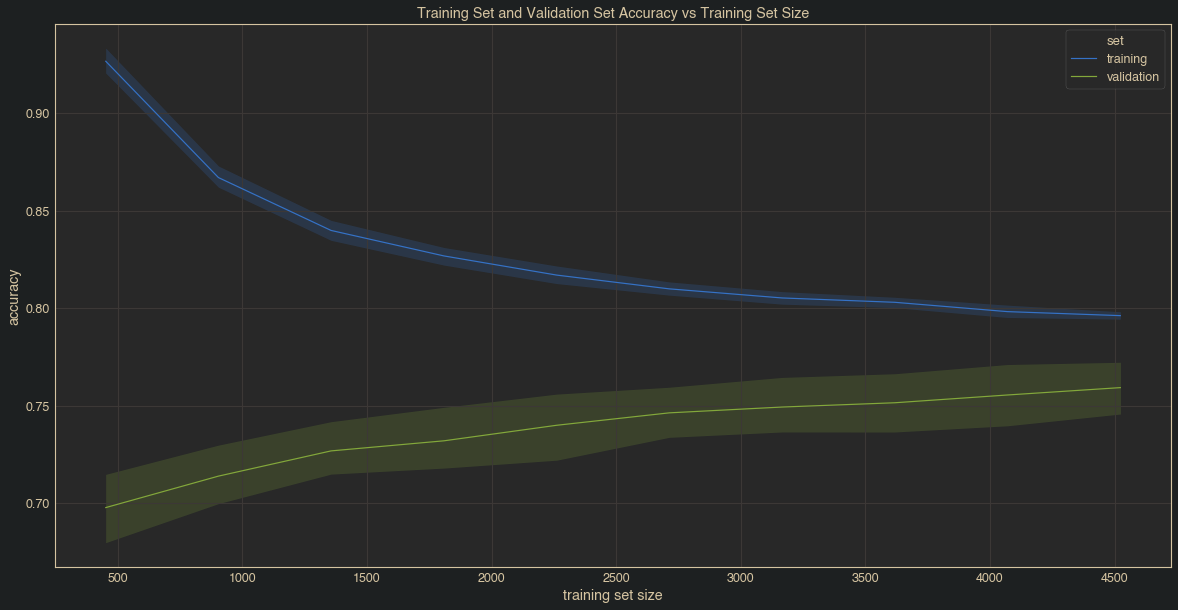

In [223]:
strat_kfold = StratifiedKFold(10, shuffle=True, random_state=42)
# group_kfold = GroupKFld(10)
# groups = get_groups(X)
plot_learning_curve(logreg, X, y, strat_kfold, data_points=10, groups=groups)

In [133]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score

logreg = LogisticRegression(C=0.1, penalty='l1',
    fit_intercept=True, max_iter=1000, random_state=42, # l1_ratio=0.8,
                        solver='saga', n_jobs=-1)
logreg.fit(X_train, y_train.values.ravel())

y_hat_test = logreg.predict(X_test)
acc = accuracy_score(y_hat_test, y_test)
acc

0.57421875